# Project 1: Analysis of Various Metrics and How They Relate to Stress and Work-Life Balance

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt

## Data Cleaning and Exploration

In [3]:
# Read csv file
wellbeing_df = pd.read_csv('data/Wellbeing_and_lifestyle_data_Kaggle.csv')
wellbeing_df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [4]:
# Change the datatype of the stress column to an integer

# First find the row(s) that is NOT a number on the stress scale
stress_scores = wellbeing_df['DAILY_STRESS'].unique()

# Convert the stress scores into a list
stress_scores_list = list(stress_scores)
print(stress_scores_list)

# From the list, drop the values that are not valid stress scores
invalid_response = '1/1/00'

# Create a variable to filter for the invalid response
drop_response = (wellbeing_df['DAILY_STRESS'] == invalid_response)

# Drop the row containing the invalid response
wellbeing_df = wellbeing_df.loc[~drop_response]
wellbeing_df

# Convert the daily stress column to an integer and check it was converted correctly
wellbeing_df['DAILY_STRESS'] = wellbeing_df['DAILY_STRESS'].astype(int)
wellbeing_df.info()

['2', '3', '1', '4', '5', '0', '1/1/00']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15971 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15971 non-null  object 
 1   FRUITS_VEGGIES           15971 non-null  int64  
 2   DAILY_STRESS             15971 non-null  int32  
 3   PLACES_VISITED           15971 non-null  int64  
 4   CORE_CIRCLE              15971 non-null  int64  
 5   SUPPORTING_OTHERS        15971 non-null  int64  
 6   SOCIAL_NETWORK           15971 non-null  int64  
 7   ACHIEVEMENT              15971 non-null  int64  
 8   DONATION                 15971 non-null  int64  
 9   BMI_RANGE                15971 non-null  int64  
 10  TODO_COMPLETED           15971 non-null  int64  
 11  FLOW                     15971 non-null  int64  
 12  DAILY_STEPS              15971 non-null  int64  
 13  LIVE_VISION              15971 non-

## Data Analysis for Expertise

In [5]:
# Create a new dataframe with the columns for to-do completed, personal awards, achievement,
# and sufficient income
expertise_df = wellbeing_df[['AGE','GENDER','TODO_COMPLETED','PERSONAL_AWARDS',
                             'ACHIEVEMENT','SUFFICIENT_INCOME','WORK_LIFE_BALANCE_SCORE']] 
# Rename the columns
expertise_df = expertise_df.rename(columns={'AGE':'Age','GENDER':'Gender','TODO_COMPLETED':'To-Do Completed','PERSONAL_AWARDS':'Personal Awards',
                                            'ACHIEVEMENT':'Achievements','SUFFICIENT_INCOME':'Sufficient Income','WORK_LIFE_BALANCE_SCORE':'Work Life Balance Score'},copy=False)
expertise_df.head()

,Age,Gender,To-Do Completed,Personal Awards,Achievements,Sufficient Income,Work Life Balance Score
0,36 to 50,Female,6,4,2,1,609.5
1,36 to 50,Female,5,3,5,2,655.6
2,36 to 50,Female,2,4,3,2,631.6
3,51 or more,Female,3,5,2,1,622.7
4,51 or more,Female,5,8,2,2,663.9


In [6]:
# From the expertise dataframe, create one for males and one for females 
male_expertise = expertise_df[expertise_df['Gender']=='Male']
female_expertise = expertise_df[expertise_df['Gender']=='Female']

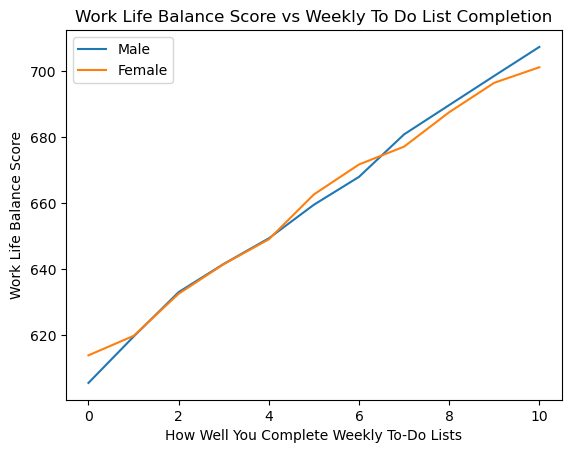

In [7]:
# Group by to-do completed and take the average work life balance score of each group
male_todo = male_expertise.groupby('To-Do Completed')['Work Life Balance Score'].mean()
female_todo = female_expertise.groupby('To-Do Completed')['Work Life Balance Score'].mean()

# Plot the data
male_todo.plot(label='Male')
female_todo.plot(label='Female')

# Create x a y labels and title
plt.xlabel('How Well You Complete Weekly To-Do Lists')
plt.ylabel('Work Life Balance Score')
plt.title('Work Life Balance Score vs Weekly To Do List Completion')
plt.legend(loc='best')
plt.show()

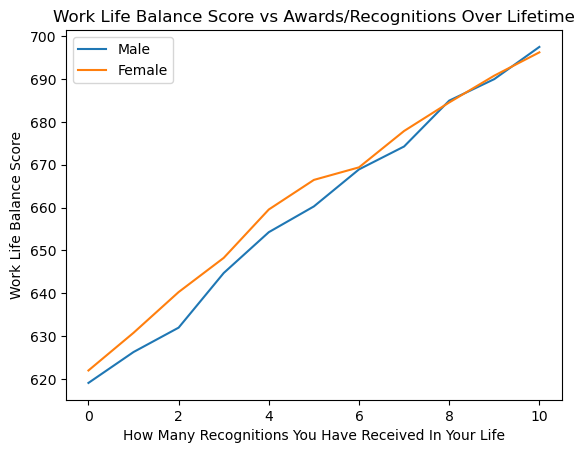

In [8]:
# Group by personal awards and take the average work life balance score of each group
male_awards = male_expertise.groupby('Personal Awards')['Work Life Balance Score'].mean()
female_awards = female_expertise.groupby('Personal Awards')['Work Life Balance Score'].mean()

# Plot the data
male_awards.plot(label='Male')
female_awards.plot(label='Female')

# Create x a y labels and title
plt.xlabel('How Many Recognitions You Have Received In Your Life')
plt.ylabel('Work Life Balance Score')
plt.title('Work Life Balance Score vs Awards/Recognitions Over Lifetime')
plt.legend(loc='best')
plt.show()

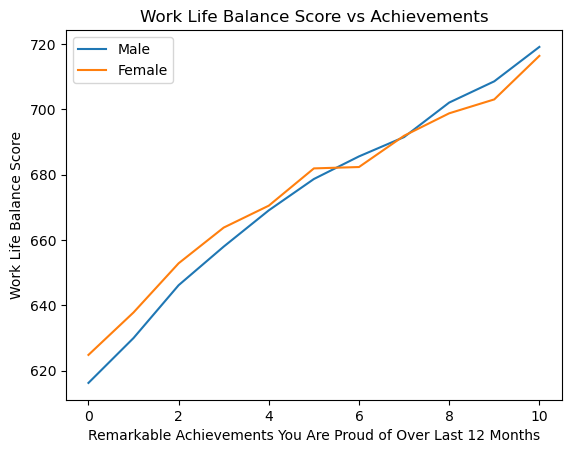

In [9]:
# Group by achievements and take the average work life balance score of each group
male_achievements = male_expertise.groupby('Achievements')['Work Life Balance Score'].mean()
female_achievements = female_expertise.groupby('Achievements')['Work Life Balance Score'].mean()

# Plot the data
male_achievements.plot(label='Male')
female_achievements.plot(label='Female')

# Create x a y labels and title
plt.xlabel('Remarkable Achievements You Are Proud of Over Last 12 Months')
plt.ylabel('Work Life Balance Score')
plt.title('Work Life Balance Score vs Achievements')
plt.legend(loc='best')
plt.show()